In [181]:
# 6.1.4 API_Practice
# Test: zip a smaller number of latitudes and longitudes; unpack the zipped tuple to see how packing and unpacking works.

In [182]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [183]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [184]:
# Use the tuple() function to display the latitude and longitude combinations(coordinate pairs).
# Output is ordered pairs of x and y coordinates.
# ***commented this out to run the citypy.nearest_city tuple function.***
#for coordinate in coordinates:
    #print(coordinate[0], coordinate[1])

In [185]:
# unpack lat_lngs zip object into a list; this way only a random set of latitudes and longitudes need to be created at once

In [186]:
# 6.1.5 API_Practice
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Use the five pairs of lats and longs from zip API_practice notebook to get a city and country code from the citipy module.

# Create a for loop that will do the following:
    # Iterate through the coordinates' zipped tuple.
    # Use citipy.nearest_city() and inside the parentheses of nearest_city(), add the latitude and longitude in this format: coordinate[0], coordinate[1].
    # To print the city name, chain the city_name to the nearest_city() function.
    # To print the country name, chain the country_code to the nearest_city() function.

In [187]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


# 6.2.1 Understanding APIs - Application Programming Interface  
  
Requires an API Key
An API call is very similar to navigating to a website.  
An API points to a URL and collects some data from the webpage or server.  

Using an API has its limitations because not all information from a server is accessible. Most APIs have tiered services, from free to paid. Free services allow access to limited information, and paid subscriptions provide more access based on the payment plan.  

# 6.2.2 Get Started With OpenWeatherMap API  
  
## The JavaScript Object Notation Format for API Data  
  
- One format use to parse data from a website is JavaScript Object Notation (JSON).  
- Also referred to as an "object" or "JSON object".  
- Data inside a JSON object opens and closes with curly braces, much like a Python dictionary.  
    - curly braces that wrap the data, and inside the curly braces are dictionaries and arrays
- Inside the JSON object is a collection of dictionaries and arrays.  

## The Python Requests Library  
- Use the Requests Library in Python to request JSON data over the internet.

In [188]:
# Check the version of requests installed in Python environment
import requests
requests.__version__

'2.25.1'

# 6.2.3 Make an API Call  

Before making an API call for the OpenWeatherMap, use the URL provided on the OpenWeatherMap website.

Look at the documentation on the OpenWeatherMap website.

Navigate to the OpenWeatherMap API documentation for current weather (Links to an external site.).

This page provides instructions on how to make the API call by city name. The structure of our URL should look like the following:

api.openweathermap.org/data/2.5/weather?q=city&appid=b6907d289e10d714a6e88b30761fae22

Add API key and the city from the cities array for each call.
  
### **NOTE** Once URL is printed, be sure to delete your printed URL from your notebook. This prevents private API key from being stored in plain text.

In [189]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [190]:
# Starting URL for Weather Map API Call.
# original URL structure from weathermap site: api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [191]:
# Note: another feature to the URL was added in the previous cell: units=Imperial.
# There are three unit options: standard, metric, and imperial.
# Navigating to the units section of the current weather data page(https://openweathermap.org/current#data)
#      will show the options for the unit format: standard metric, and imperial.

In [192]:
# Add a city to the URL to get the current weather data.
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [193]:
# In the previous cell:
#     a string is created to get the weather data for Boston by using the "city_url"
#     the "city_url" is created by adding the parameter,"&q" and "Boston" to the url
#     the output of this cell will be a url, if clicked, a new window opens in a default browser
#           that shows current weather data for Boston.
#     Note: to make the format of the url JSON format readable, the extension must be added to the browser
#     (https://chrome.google.com/webstore/detail/jsonview/chklaanhfefbnpoihckbnefhakgolnmc)-Firefox does not need an extension.

# 6.2.4 Make a Request for Data to an API  
### Retrieve a Response Using the "get()" Method  
  
Use the "get()" method, a feture of the Requests Library, to request data from an API.  
The "get()" method is one of many HTTP methods that allow to access, add, delete, get the headers, and perform other actions on request.  

## List of HTTP Methods and Their Uses

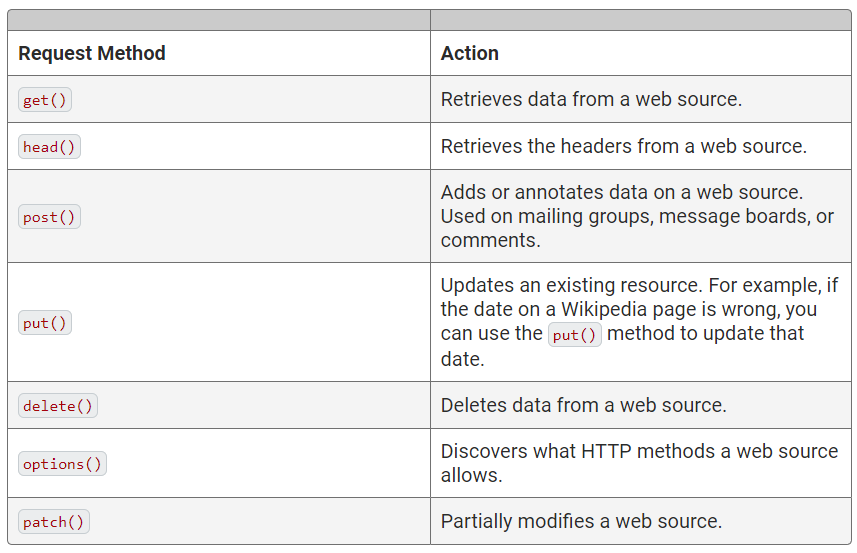  

In [194]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [195]:
# Chain "status_code" to the variable to et the status output.
# Bad websites appear as a 404 error>may result from an incorrect url, misspellings, etc.
# Create an endpoint URL for a misspelled city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

# Get Data From a Response  

When a valid response is received from a server, the format has to be decided  
The options are text, JSON, XML, or HTML format  
The format attributes can be applied to get data into a useful format to parse  
- Text is the output of a dictionary of dictionaries and arrays, or a JSON file  
    - may not be useful if scientific data such as temperature("temp") or humidity("humidity") needs to be retrieved  
- JSON method makes it a lot easier to see the overall structure of the data, which makes it easier to retrieve scientific data  

In [196]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [197]:
# Text attribute format provides a preview of the JSON data
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":78.24,"feels_like":78.3,"temp_min":72.95,"temp_max":83.61,"pressure":1020,"humidity":54},"visibility":10000,"wind":{"speed":1.99,"deg":155,"gust":8.99},"clouds":{"all":0},"dt":1627146085,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1627118936,"sunset":1627171934},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [198]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 78.24,
  'feels_like': 78.3,
  'temp_min': 72.95,
  'temp_max': 83.61,
  'pressure': 1020,
  'humidity': 54},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 155, 'gust': 8.99},
 'clouds': {'all': 0},
 'dt': 1627146085,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1627118936,
  'sunset': 1627171934},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

# Handle Request Errors  
This ensures a valid response is received from the request  
Done using conditional expressions  

  ### **Note**  
       In the below example, if the status_code is something other than 200, JSON data will always be returned in the  
       request.A response can be determined as successful by checking the status_code, clicking the URL, or retrieving  
       specific information from the JSON data.

In [199]:
# Create an endpoint URL for a city using a conditional expression.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [200]:
# Create an endpoint URL for a city.  
# *PRINTED CITY WEATHER FOUND* - DEBUG
city_url = url + "&q=" + "Bstn"
city_weather = requests.get(city_url)

if city_weather.json()['cod'] == "200":
        print(f"City Weather found.")
else:
        print(f"{city_weather.json()['message']}")
        
# This code did not run as suggested in the instructions and changes had to be made. 

city not found


# 6.2.5 Parse a Response from an API  
- Data parsing is the method where a string of data gets converted into a different type of data  
Next step is to begin mining the JSON file to retrieve specific weather data for each city and add it to a DataFrame.  
    
### For each city in our {lats_lngs} list, the following data has to be retrieved and added to a DataFrame:  
    - City, country, and date  
    - Latitude and Longitude  
    - Maximum temperature  
    - Humidity  
    - Cloudiness  
    - Wind Speed

In [201]:
# Practice
# Getting the weather data for Boston.
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 78.24,
  'feels_like': 78.3,
  'temp_min': 72.95,
  'temp_max': 83.61,
  'pressure': 1020,
  'humidity': 54},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 155, 'gust': 8.99},
 'clouds': {'all': 0},
 'dt': 1627146085,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1627118936,
  'sunset': 1627171934},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [202]:
# Practice
# Assign a variable to the "city_weather.json()" data.
# Get the JSON data.
boston_data = city_weather.json()

In [203]:
# Practice
# Use the "[sys]" key to get the corresponding value
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1627118936,
 'sunset': 1627171934}

In [204]:
# Practice
# Add the "[country]" key after the "[sys]" key to get the country
boston_data["sys"]["country"]

'US'

## **NOTE**  
When using the boston_data["sys"], there was a key for sunrise and a key for sunset in the output.  
The value for these keys is the time of day in seconds in a database timestamp format.  
  
To retrieve the date in the weather data, add the "[dt]" key to the variable.  

In [205]:
boston_data["dt"]

1627146085

Using similar syntax to get the time of day,  
the latitude, longitude, maximum temperature, humidity, percent cloudiness, and wind speed  
can be retrieved.  

The output will be all of the weather parameters, with the units for maximum temperature in degrees Fahrenheit,  
the humidity and clouds as a percentage, and the wind in miles per hour.

In [206]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 83.61 54 0 1.99


## Convert the Date Timestamp  
The date format appears in seconds as seen previously when using the ["dt"] key.(ex. 1627124774)  
This format is called Coordinated Universal Time(UTC) or Greenwich Mean Time(GMT).  
To convert the timestamp to the International Organization for Standardization(ISO) format, or  
YYYY-MM-DD-HH-MM-SS, the Python datetime module is used.  
The output will be in ISO format but delimited by commas.  
This output can be converted and formatted to YYYY-MM-DD HH:MM:SS using the Python string format method "strftime()";  
    adding how it should print in the parentheses like so:  
    "strftime('%Y-%m-%d %H:%M:%S')".

In [207]:
# Convert the date from the Boston weather data in the JSON format to the ISO format.  
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 7, 24, 17, 1, 25)

In [208]:
# Add .strftime('%Y-%m-%d %H:%M:%S') to the end of the conversion:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-07-24 17:01:25'

# 6.2.6 Get the City Weather Data  
  
## Pseudocode  
  
- Import our dependencies and initialize counters and an empty list that will hold the weather data.  
- Loop through the cities list.  
- Group the cities in sets of 50 to log the process as we find the weather data for each city.  
    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
- Build the city_url or endpoint for each city.
- Log the URL and the record and set numbers.  
- Make an API request for each city.
- Parse the JSON weather data for the following:  
    - City, country, and date  
    - Latitude and longitude  
    - Maximum temperature  
    - Humidity  
    - Cloudiness  
    - Wind speed  
- Add the data to a list in a dictionary format and then convert the list to a DataFrame.  